Nuestra regla arbitraria fue que si almenos uno de los indicadores no coincidia en la decision de compra o de venta, no se tomaria, realizando el codigo de Best_Combination, descubrimos que la mejor combinacion con los mejores indicadores corresponde unicamente al indicador RSI

In [1]:
from prediction import def_trading_strategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../../../data/aapl_1h_train.csv")
rsi_data = ta.momentum.RSIIndicator(data.Close, window=14)
data["RSI"] = rsi_data.rsi()
data = data.dropna()

Encontramos que los mejores parametros del indicador fueron:

## RSI
Mejores parámetros encontrados:
{'n_shares': 36, 'stop_loss_close': 0.8493944230503813, 'take_profit_close': 1.3472201709899378, 'Umbral': 29.972576763871043}

Select the optimal strategy and describe it thoroughly (what indicators are used, when is the trade signal produced, etc.).

optimal strategy: RSI
como funciona rsi?

la senal de trade es: si el precio de la accion es menor al 0.84*el ultimo close, compra, si el precio de la accion es mayor al 1.34*el ultimo close, vende. 
fue la mejor estrategia segun nuestro backtesting, el codigo de best_combination, y el que dio mejor profit

In [3]:
rsi, port_value, ca = def_trading_strategy(data, 39, 0.82, 1.18, 28, data["RSI"])

rsi

8987.567098185003

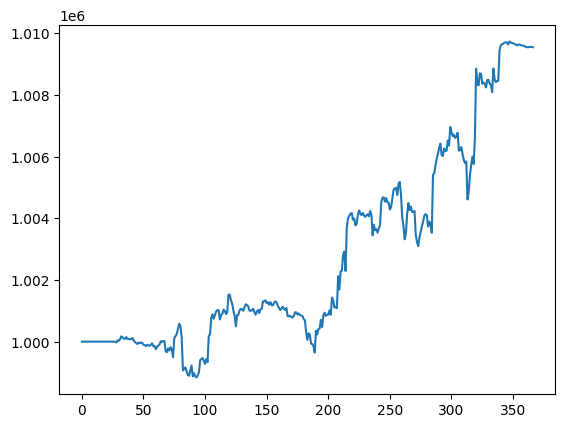

In [4]:
plt.plot(port_value)

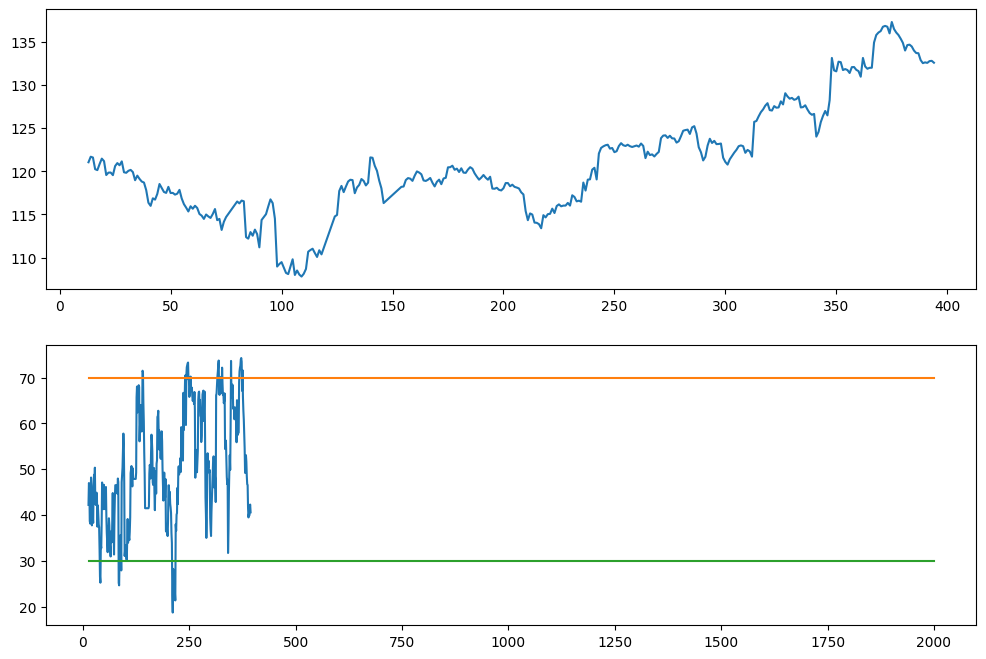

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(data.Close[:2000])
ax[1].plot(data.RSI[:2000])
ax[1].plot([14,2000], [70,70], label="Upper Threshold")
ax[1].plot([14,2000], [30,30], label="Lower Threshold")